In [2]:
!pip3 install pandas statsmodels matplotlib

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 10.3 MB/s eta 0:00:00a 0:00:01
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarnin

            PM10      PM2.5          CO        SO2        NO2        O3
32659  44.581407  25.374654  709.456849  32.693781  34.883787  1.342844
32660  44.763534  24.659836  680.675910  32.826420  35.013395  1.388819
32661  45.382950  25.752370  663.565279  33.823975  35.139104  1.381652
32662  46.079658  27.417851  682.429314  34.599968  35.142628  1.350388
32663  46.040728  28.888525  713.258185  35.149954  34.981321  1.336977
32664  45.386558  29.494167  731.705584  35.498984  34.820622  1.373921
32665  45.501012  29.329949  741.485502  35.556477  34.987962  1.360180
32666  45.474235  28.880014  743.889275  35.390302  35.005228  1.362813
0      39.370000  33.670000   13.350000   2.380000   6.250000  0.100000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


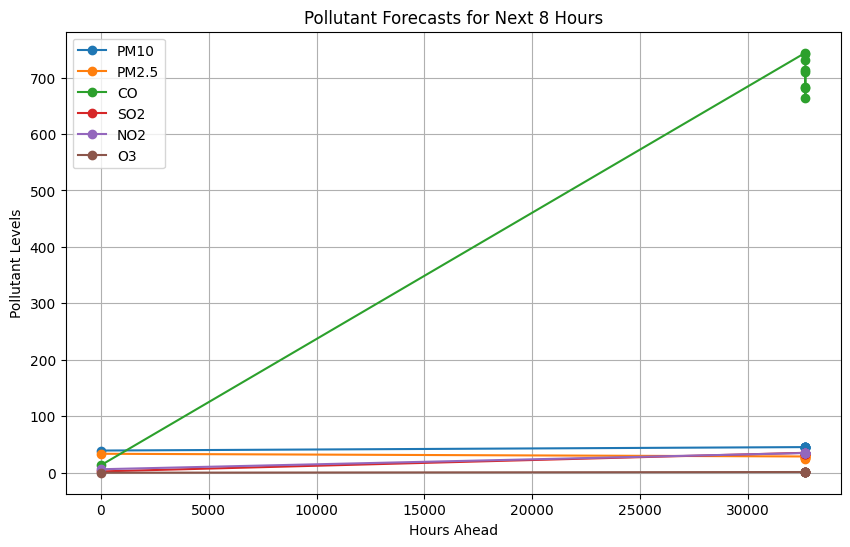

In [5]:
# Importing necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv('./data/history_data.csv')

# Convert 'DateTime' to datetime format and set as index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Define pollutants of interest
pollutants = ['PM10', 'PM2.5', 'CO', 'SO2', 'NO2', 'O3']

# Function to forecast next 8 hours using ARIMA
def forecast_pollutant(data, pollutant, current_value, hours=8):
    model = ARIMA(data[pollutant], order=(5,1,0)) # ARIMA with p=5, d=1, q=0 (adjust based on the pollutant)
    model_fit = model.fit()
    
    # Forecast the next 'hours' values
    forecast = model_fit.forecast(steps=hours)
    
    # Replace the first forecast value with the current input value (to align)
    forecast[0] = current_value
    return forecast

# Given current pollutant values
current_values = {
    "PM10": 39.37,
    "PM2.5": 33.67,
    "SO2": 2.38,
    "NO2": 6.25,
    "CO": 13.35,
    "O3": 0.10
}

# Forecast for the next 8 hours for each pollutant
forecasts = {}
for pollutant in pollutants:
    forecast = forecast_pollutant(data, pollutant, current_values[pollutant])
    forecasts[pollutant] = forecast

# Display forecast results
forecasts_df = pd.DataFrame(forecasts)
# print("\n\nForecast\n")
print(forecasts_df)

# Plotting forecast for each pollutant
forecasts_df.plot(figsize=(10,6), marker='o')
plt.title('Pollutant Forecasts for Next 8 Hours')
plt.ylabel('Pollutant Levels')
plt.xlabel('Hours Ahead')
plt.grid(True)
plt.show()


                          PM10      PM2.5          CO        SO2        NO2  \
2024-09-03 20:00:00  89.370000  60.670000   13.350000   2.380000   6.250000   
2024-09-03 21:00:00  44.758022  24.659334  680.761178  32.825505  35.013416   
2024-09-03 22:00:00  45.375115  25.752019  663.650979  33.822847  35.139148   
2024-09-03 23:00:00  46.070682  27.417482  682.519425  34.598524  35.142665   
2024-09-04 00:00:00  46.033189  28.887611  713.322589  35.148162  34.981326   
2024-09-04 01:00:00  45.382404  29.492848  731.735582  35.497135  34.820609   
2024-09-04 02:00:00  45.496382  29.328620  741.499980  35.554863  34.987978   
2024-09-04 03:00:00  45.469141  28.878860  743.897302  35.388955  35.005252   

                           O3  
2024-09-03 20:00:00  0.100000  
2024-09-03 21:00:00  1.388821  
2024-09-03 22:00:00  1.381655  
2024-09-03 23:00:00  1.350389  
2024-09-04 00:00:00  1.336976  
2024-09-04 01:00:00  1.373922  
2024-09-04 02:00:00  1.360180  
2024-09-04 03:00:00  1.362814  


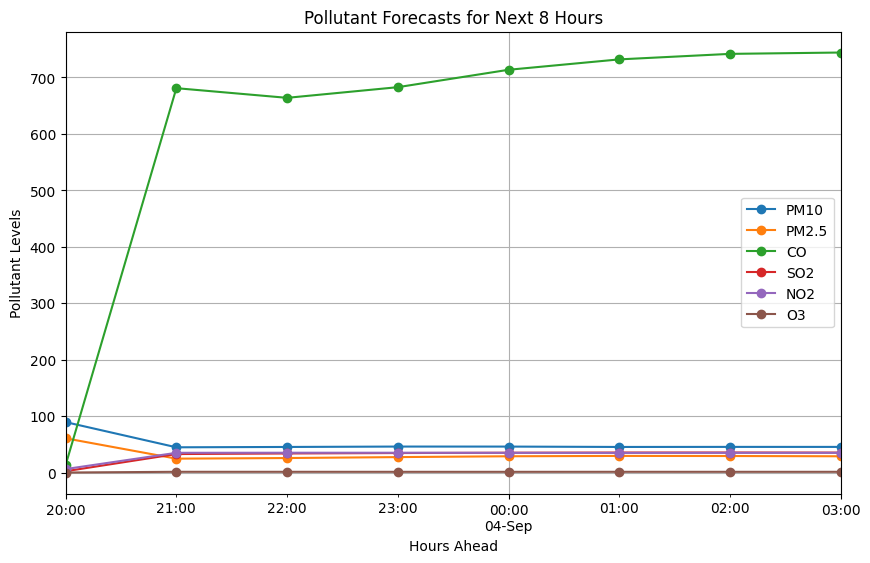

In [18]:
# Cell 1: Importing necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Cell 2: Load dataset
data = pd.read_csv('./data/history_data.csv')  # Update the path to your local dataset

# Convert 'DateTime' to datetime format and set frequency to hourly
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)
data = data.asfreq('h')  # Ensure continuous hourly frequency

# Fill any missing data after setting frequency
data = data.ffill()

# Cell 3: Define pollutants of interest
pollutants = ['PM10', 'PM2.5', 'CO', 'SO2', 'NO2', 'O3']

# Cell 4: Function to apply ARIMA model and forecast next 8 hours
def forecast_pollutant(data, pollutant, current_value, hours=8):
    ts = data[pollutant]
    
    # Ensure there's enough data to fit the model
    if len(ts) > 10:
        try:
            # Fit ARIMA model with (5,1,0)
            model = ARIMA(ts, order=(5,1,0))
            model_fit = model.fit()
        except:
            # If error occurs, adjust ARIMA parameters and retry
            model = ARIMA(ts, order=(1,1,0))
            model_fit = model.fit()
        
        # Forecast the next 'hours' values
        forecast = model_fit.forecast(steps=hours)
        
        # Replace the first forecast value with the current input value (to align)
        forecast.iloc[0] = current_value
        return forecast
    else:
        print(f"Not enough data to fit model for {pollutant}")
        return np.array([current_value]*hours)

# Cell 5: Given current pollutant values
current_values = {
    "PM10": 89.37,
    "PM2.5": 60.67,
    "SO2": 2.38,
    "NO2": 6.25,
    "CO": 13.35,
    "O3": 0.10
}

# Cell 6: Forecast for the next 8 hours for each pollutant
forecasts = {}
for pollutant in pollutants:
    forecast = forecast_pollutant(data, pollutant, current_values[pollutant])
    forecasts[pollutant] = forecast

# Display forecast results
forecasts_df = pd.DataFrame(forecasts)
print(forecasts_df)

# Cell 7: Plotting forecast for each pollutant
forecasts_df.plot(figsize=(10,6), marker='o')
plt.title('Pollutant Forecasts for Next 8 Hours')
plt.ylabel('Pollutant Levels')
plt.xlabel('Hours Ahead')
plt.grid(True)
plt.show()


/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_22617/3944625669.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = forecast + (current_value - forecast[0])
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_22617/3944625669.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = forecast + (current_value - forecast[0])
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_22617/3944625669.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

                          PM10      PM2.5         CO       SO2       NO2  \
2024-09-03 20:00:00  55.370000  33.670000  13.350000  2.380000  6.250000   
2024-09-03 21:00:00  55.857142  33.062383   6.051615  1.644536  5.520244   
2024-09-03 22:00:00  56.077101  32.989458   5.379571  1.439534  5.469060   
2024-09-03 23:00:00  56.176419  32.980705   5.317689  1.382392  5.465471   
2024-09-04 00:00:00  56.221264  32.979655   5.311990  1.366464  5.465219   
2024-09-04 01:00:00  56.241513  32.979529   5.311466  1.362024  5.465201   
2024-09-04 02:00:00  56.250656  32.979513   5.311417  1.360787  5.465200   
2024-09-04 03:00:00  56.254785  32.979512   5.311413  1.360442  5.465200   

                           O3  
2024-09-03 20:00:00  0.100000  
2024-09-03 21:00:00  0.114961  
2024-09-03 22:00:00  0.114610  
2024-09-03 23:00:00  0.114618  
2024-09-04 00:00:00  0.114618  
2024-09-04 01:00:00  0.114618  
2024-09-04 02:00:00  0.114618  
2024-09-04 03:00:00  0.114618  


/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_22617/3944625669.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = forecast + (current_value - forecast[0])


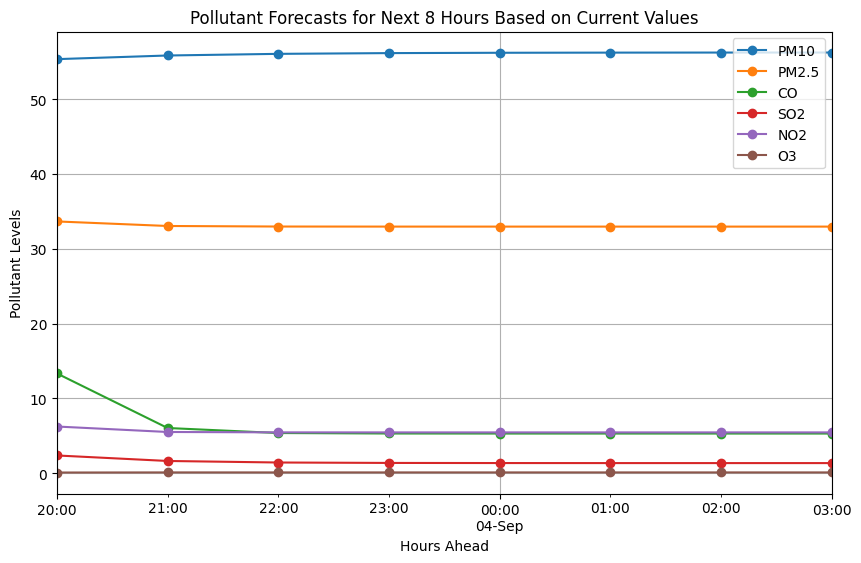

In [22]:
# Cell 1: Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import joblib  # For saving the model and scaler

# Cell 2: Load dataset
data = pd.read_csv('./data/history_data.csv')  # Update the path to your local dataset

# Convert 'DateTime' to datetime format and set frequency to hourly
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)
data = data.asfreq('h')  # Ensure continuous hourly frequency

# Fill any missing data after setting frequency
data = data.ffill()

# Cell 3: Define pollutants of interest
pollutants = ['PM10', 'PM2.5', 'CO', 'SO2', 'NO2', 'O3']

# Cell 4: Function to apply ARIMA model and forecast next 8 hours
# Fine-tuned ARIMA with short memory
def forecast_pollutant(current_value, ts, hours=8):
    # Model ARIMA with short memory (p=1, d=1, q=1)
    model = ARIMA(ts, order=(1,1,1))
    model_fit = model.fit()
    
    # Save the model to a file
    model_filename = f"arima_model_{pollutant}.pkl"
    joblib.dump(model_fit, model_filename)  # Saving model

    # Forecast the next 'hours' values based on the current trend
    forecast = model_fit.forecast(steps=hours)
    
    # Adjust the forecast to start from the current value
    forecast = forecast + (current_value - forecast[0])
    
    return forecast

# Cell 5: Given current pollutant values
current_values = {
    "PM10": 55.37,  # Updated value for PM10
    "PM2.5": 33.67,
    "SO2": 2.38,
    "NO2": 6.25,
    "CO": 13.35,
    "O3": 0.10
}

# Cell 6: Forecast for the next 8 hours for each pollutant
forecasts = {}
for pollutant in pollutants:
    # Get the historical time series for the pollutant
    ts = data[pollutant]

    # Use the current value provided as the base for forecasting
    forecast = forecast_pollutant(current_values[pollutant], ts)
    forecasts[pollutant] = forecast

# Display forecast results
forecasts_df = pd.DataFrame(forecasts)
print(forecasts_df)

# Cell 7: Plotting forecast for each pollutant
forecasts_df.plot(figsize=(10,6), marker='o')
plt.title('Pollutant Forecasts for Next 8 Hours Based on Current Values')
plt.ylabel('Pollutant Levels')
plt.xlabel('Hours Ahead')
plt.grid(True)
plt.show()


In [2]:
# Cell 8: Loading the saved ARIMA model and using it for forecasting
import joblib

# Cell 9: Load the ARIMA model from a file
pollutant = 'PM10'  # Change this to load the model for any other pollutant
model_filename = f"arima_model_{pollutant}.pkl"
loaded_model = joblib.load(model_filename)

# Cell 10: Forecast using the loaded model
# You can change the `current_value` if needed
current_value = 52

# Perform forecast for the next 8 hours
forecast = loaded_model.forecast(steps=8)

# Adjust the forecast to start from the current value
forecast = forecast + (current_value - forecast[0])

print(f"Forecast for {pollutant}:")
print(forecast)

Forecast for PM10:
2024-09-03 20:00:00    52.000000
2024-09-03 21:00:00    52.487142
2024-09-03 22:00:00    52.707101
2024-09-03 23:00:00    52.806419
2024-09-04 00:00:00    52.851264
2024-09-04 01:00:00    52.871513
2024-09-04 02:00:00    52.880656
2024-09-04 03:00:00    52.884785
Freq: h, Name: predicted_mean, dtype: float64


/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_47958/3855801603.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = forecast + (current_value - forecast[0])


In [30]:
# Cell 1: Importing necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Cell 2: Load dataset
data = pd.read_csv('./data/history_data.csv')  # Update the path to your local dataset

# Convert 'DateTime' to datetime format and set frequency to hourly
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)
data = data.asfreq('h')  # Ensure continuous hourly frequency

# Fill any missing data after setting frequency
data = data.ffill()

# Cell 3: Given current pollutant values (these are the inputs for forecasting)
current_values = {
    "PM10": 55.37,  # Updated value for PM10
    "PM2.5": 33.67,
    "SO2": 2.38,
    "NO2": 6.25,
    "CO": 13.35,
    "O3": 0.10
}

# Cell 4: Function to apply ARIMA model and forecast next 8 hours
# Tuned ARIMA model with more sensitivity to past fluctuations
def forecast_pollutant(current_value, ts, hours=8):
    # Model ARIMA with larger p and q values to capture more fluctuations
    model = ARIMA(ts, order=(3,1,3))  # Increased p and q to add variability
    model_fit = model.fit()

    # Forecast the next 'hours' values based on the current trend
    forecast = model_fit.forecast(steps=hours)

    # Adjust the forecast to start from the current value
    forecast = forecast + (current_value - forecast[0])
    
    return forecast

# Cell 5: Forecast for the next 8 hours for each pollutant
pollutant = 'PM10'  # Let's focus on PM10 first
ts = data[pollutant]

# Use the current value provided as the base for forecasting
forecast = forecast_pollutant(current_values[pollutant], ts)

# Display forecast results
forecast.index = pd.date_range(start=pd.to_datetime('2024-09-03 20:00:00'), periods=len(forecast), freq='H')
print(f"Forecast for {pollutant}:")
print(forecast)

# Cell 6: Plotting forecast for the pollutant
# forecast.plot(figsize=(10,6), marker='o')
# plt.title(f'Forecast for {pollutant} (Next 8 Hours)')
# plt.ylabel(f'{pollutant} Level')
# plt.xlabel('Time')
# plt.grid(True)
# plt.show()


Forecast for PM10:
2024-09-03 20:00:00    55.370000
2024-09-03 21:00:00    54.788911
2024-09-03 22:00:00    54.751987
2024-09-03 23:00:00    54.709205
2024-09-04 00:00:00    54.647903
2024-09-04 01:00:00    54.630768
2024-09-04 02:00:00    54.591222
2024-09-04 03:00:00    54.583964
Freq: h, Name: predicted_mean, dtype: float64


/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_22617/1571572178.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = forecast + (current_value - forecast[0])
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_22617/1571572178.py:51: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast.index = pd.date_range(start=pd.to_datetime('2024-09-03 20:00:00'), periods=len(forecast), freq='H')
